# Proposal for Time Series Trend and Model prediction

* Author: Claudia Hernández

## Problem A: Trend prediction
The trend statistical tests proposed for the time series analysis are listed below, it is important to know the assumptions of each test, mainly if data is expected to be uncorrelated or correlated with previous time points and seasonal effects.

### Mann-Kendall test (non-parametric) | STATUS: DONE FOR PROPOSAL FIRST REVIEW 

The test assesses whether there is a monotonic upward or downward trend in the time series, without assuming any specific distribution of the data. A monotonic trend implies that the data values consistently increase or decrease over time, but not necessarily at a constant rate.

* Python function is available here, and it offers different models to consider correlated, uncorrelated and seasonal time series: https://pypi.org/project/pymannkendall/

- H0 : there is no trend in the data series
- H1 : there is a trend in the data series

### Change-point test (Pettitt's test, non-parametric) | STATUS: TO BE DONE IF PROPOSAL IS ACCEPTED.

Detects significant shifts in a Time Series

- H0 : Absence of a change point
- H1 : Presence of change point

### Wald-Wolfowitz runs test (non-parametric) | STATUS: TO BE DONE IF PROPOSAL IS ACCEPTED.

- H0 : the sequence was generated randomly (no trend)
- H1 : the sequence was not generated randomly (has a trend)



## Problem B: Time Series Modelling

### Approach I. STATUS DONE FOR PROPOSAL FIRST REVIEW 
AI solution with Pycaret, it uses time lags or time series components as features to build a time series model and to perform future forecasting, it has an automatic function that selects the best model.

Some of the algorithms included in pycaret used for forecasting are:

    -Linear Regression
    -Ridge Regression
    -Lasso Regression
    -Elastic Net
    -Least Angle Regression (LARS)
    -Bayesian Ridge
    -Polynomial Regression
    -Support Vector Regression (SVR)
    -Decision Tree Regression
    -K-Nearest Neighbors Regression
    -Random Forest Regression
    -Gradient Boosting Regression
    -Extreme Gradient Boosting (XGBoost)
    -Light Gradient Boosting Machine (LightGBM)
    -CatBoost Regression
    -AdaBoost Regression
    -Extra Trees Regression

### Approach II. STATUS: TO BE DONE IF PROPOSAL IS ACCEPTED

Use dedicated time series libraries such as statsmodels or Prophet, which offer built-in support for exponential smoothing methods like Holt-Winters or auto-regressive integrated moving average (ARIMA) models.

- Step 1:  Time Series Decomposition

Statsmodels is used to decompose the time series into 1) trend component, 2) seasonal components and 3) unexplained variation. 

* Equation 1.  Observations = trend * (1 + seasonal components)

- Step 2: Trend Forecasting

For forecasting we use prophet and historical data to estimate the trend as follows:

trend_future ~ trend_last_month

- Step 3: Time Series Forecasting

The forecasted values use the predicted trend and the seasonal components from last year.

* Equation 2. Predictions = trend_future * (1 + seasonal_components_last_year)

## Problem C: Choose best fitting model to forecast the future

Pick the best model of approach 1 (pycaret) and approach 2 (statsmodels + prophet) using the model evaluation metrics:

- Mean Absolute Percentual Error
- Mean Square Error
- R square


In [1]:
#Load libraries
from datetime import datetime
import pandas as pd
import numpy as np
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Data processing

In [2]:
# Load your time series data into a DataFrame
ts_df = pd.read_csv('international-airline-passengers.csv', 
                    header=None, 
                    skiprows=1, 
                    names= ['Month','Passengers'])
ts_df.head(3)
ts_df['Date'] =ts_df['Month'].apply(lambda x: x + '-01')
ts_df.drop(columns=['Month'], inplace=True)
ts_df = ts_df.dropna()

In [3]:
# Convert 'parsed_date' column to datetime type
ts_df['Date'] = pd.to_datetime(ts_df['Date'])
ts_df.tail(5)

,Passengers,Date
139,606.0,1960-08-01
140,508.0,1960-09-01
141,461.0,1960-10-01
142,390.0,1960-11-01
143,432.0,1960-12-01


# Time Series Visualization

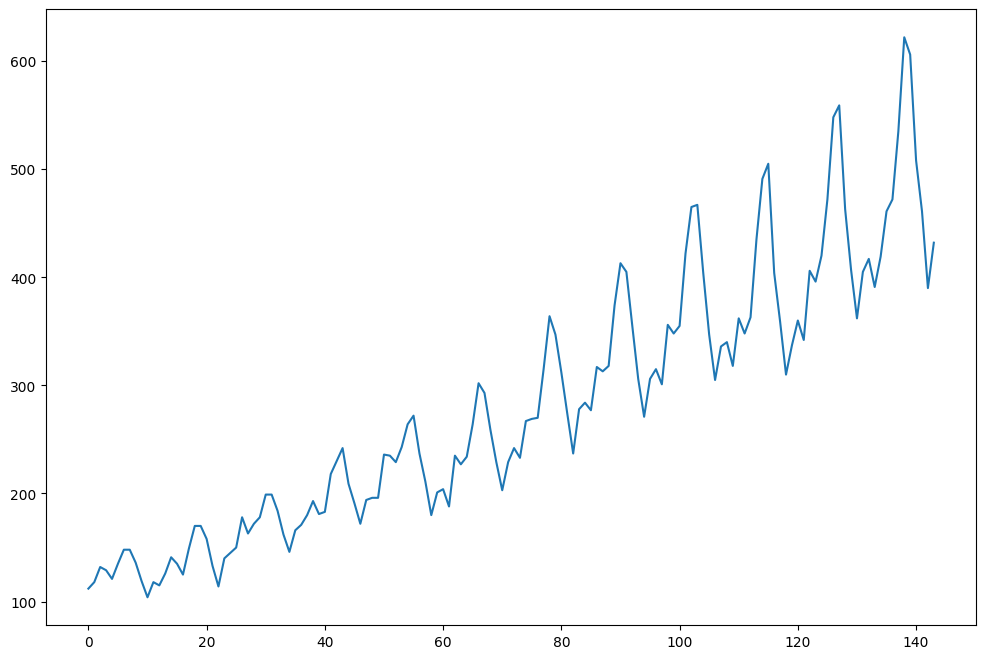

In [4]:
ts_df.Passengers.plot(figsize=(12,8));

# Autocorrelation ACF plot

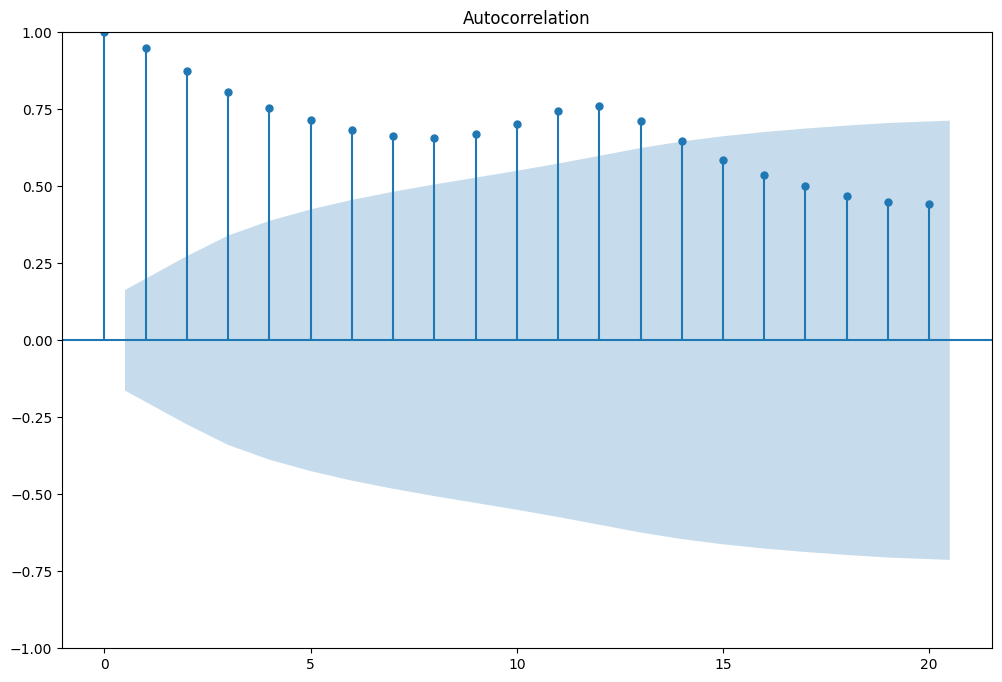

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf(ts_df.Passengers, lags=20, ax=ax);

# Trend Prediction : Mann-Kendall test

In [6]:

# Original Mann-Kendall test is a nonparametric test, 
# which does not consider serial correlation or seasonal effects
def mann_kendall_test_original(data):
    result = mk.original_test(data)
    return result

# This method proposed by Hipel (1994) used, when time series significantly correlated 
# with the preceding one or more months/seasons.

def mann_kendall_correlated_seasonal_test(data):
    result = mk.correlated_seasonal_test(data)
    return result

print("Mann-Kendall Original Test Result:", mann_kendall_test_original(ts_df.Passengers))

print("Mann-Kendall Correlated Seasonal Test Result:", mann_kendall_correlated_seasonal_test(ts_df.Passengers))


Mann-Kendall Original Test Result: Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=14.381610025544802, Tau=0.8087606837606838, s=8327.0, var_s=335164.3333333333, slope=2.451216287678477, intercept=90.23803543098887)
Mann-Kendall Correlated Seasonal Test Result: Correlated_Seasonal_Mann_Kendall_test(trend='increasing', h=True, p=7.081204407288766e-06, z=4.49123296393777, Tau=0.98989898989899, s=784.0, var_s=30472.000000000004, slope=30.23611111111111, intercept=85.3431712962963)


# Time Series Modelling Approach I.

In [7]:
# import pycaret time series and init setup
from pycaret.time_series import *

# Set cross validation training and testing strategy 
# and predict the last 12 months observed (test data) to evaluate and select the best model
s = setup(data=ts_df, target='Passengers', session_id=765, fold_strategy='rolling', fh = 12)

# Results showing significant seasonal periods


,Description,Value
0,session_id,765
1,Target,Passengers
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(144, 2)"
5,Transformed data shape,"(144, 2)"
6,Transformed train set shape,"(132, 2)"
7,Transformed test set shape,"(12, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [8]:
# summary time series statistics
s.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


In [9]:
# check available models in pycaret
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
stlf,STLF,sktime.forecasting.trend.STLForecaster,True
croston,Croston,sktime.forecasting.croston.Croston,True
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True


In [10]:
# compare baseline models 
# and sort by Mean Absolute Percentage Error (MAPE)
# select top 3 methods
best_models = s.compare_models(sort = 'MAPE', n_select = 3)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.7133,0.7059,21.0007,23.3522,0.0530,0.0531,0.8527,0.0567
snaive,Seasonal Naive Forecaster,1.1479,1.0945,33.3611,35.9139,0.0832,0.0879,0.6072,1.7500
croston,Croston,1.9311,2.3517,56.6180,77.5856,0.1295,0.1439,-0.6281,0.0267
naive,Naive Forecaster,2.3599,2.7612,69.0278,91.0322,0.1569,0.1792,-1.2216,2.3367
grand_means,Grand Means Forecaster,5.5306,5.2596,162.4117,173.6492,0.4000,0.5075,-7.0462,1.8733


In [11]:
best_models

[STLForecaster(sp=12), NaiveForecaster(sp=12), Croston()]

In [12]:
#print best model with input parameters
top_model = best_models[0]
top_model

STLForecaster(sp=12)

In [13]:
# predict on test set and get model errors
y_test = predict_model(top_model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,STLF,0.4389,0.4979,13.3636,17.2027,0.0276,0.0277,0.9466


In [14]:
y_test

,y_pred
132,412.7887
133,392.1058
134,450.6861
135,437.3620
136,458.0834
137,521.1075
138,588.3774
139,602.2847
140,498.8244
141,442.8977


In [15]:
y_observed= ts_df[-12:]
y_observed

,Passengers,Date
132,417.0,1960-01-01
133,391.0,1960-02-01
134,419.0,1960-03-01
135,461.0,1960-04-01
136,472.0,1960-05-01
137,535.0,1960-06-01
138,622.0,1960-07-01
139,606.0,1960-08-01
140,508.0,1960-09-01
141,461.0,1960-10-01


In [26]:
# plot forecast for test dataset (last 12  observed months)

plot_model(top_model, plot = 'forecast')
plt.show()
#https://github.com/cihernand/forecasting/blob/master/Forecast_last12monthsObserved.png

In [25]:
# plot forecast for 24 months in future
plot_model(top_model, plot = 'forecast',  data_kwargs = {'fh' : 24})
plt.show()
#https://github.com/cihernand/forecasting/blob/master/Forecast_next24months.png